In [2]:
from sklearn import linear_model, metrics, model_selection
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
prostate=pd.read_csv('prostate.csv', sep='\t',index_col=0)

In [4]:
assert len(prostate.columns)==10
assert len(prostate)==97
prostate.columns

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa', 'train'],
      dtype='object')

In [5]:
train= prostate[prostate['train']=='T'].drop(['train'], axis=1)
test= prostate[prostate['train']=='F'].drop(['train'], axis=1)

In [6]:
test.shape[0]/(test.shape[0]+train.shape[0])*100

30.927835051546392

In [7]:
X_train=train.loc[:,train.columns != 'lpsa']
y_train=train['lpsa']
X_test=test.loc[:,test.columns != 'lpsa']
y_test=test['lpsa']

## Linear regression

In [8]:
lr= linear_model.LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [9]:
train_prediction=lr.predict(X_train)

mse_train=metrics.mean_squared_error(y_train,train_prediction)
print((mse_train)**.5)

0.662721486039448


In [10]:
test_prediction=lr.predict(X_test)
mse_test=metrics.mean_squared_error(y_test,test_prediction)
print((mse_test)**.5)

0.7219930785731952


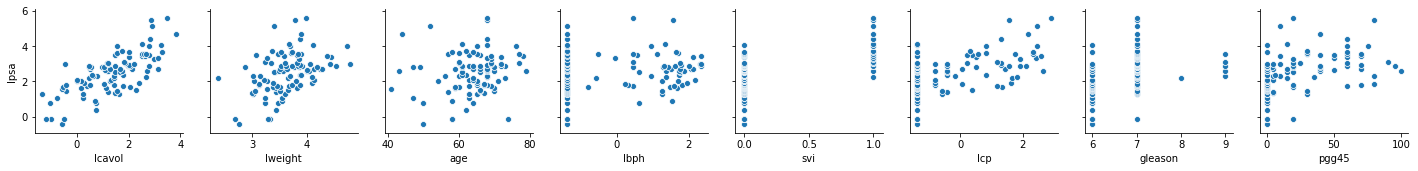

In [11]:
sns.pairplot(prostate,x_vars=['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'],y_vars='lpsa')

## Feature selection

In [12]:
X_train2=train.loc[:,train.columns != 'lpsa']
X_train2=X_train2.loc[:,X_train2.columns != 'age']
X_test2=test.loc[:,test.columns != 'lpsa']
X_test2=X_test2.loc[:,X_test2.columns != 'age']

In [13]:
lr.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [14]:
test2_prediction=lr.predict(X_test2)
mse_test2=metrics.mean_squared_error(y_test,test2_prediction)
print((mse_test2)**.5)
#bad job feature selecting by eye Nate

0.7535372606269776


## Ridge regression

In [15]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.mean_squared_error(y,preds)

In [16]:
alphas = np.linspace(0,0.5,11)
alphas

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [17]:
#find best alpha parameter based off training set
MSE=[]
for a in alphas:
    ridge = linear_model.Ridge(alpha=a,normalize=True)
    mse=model_selection.cross_val_score(ridge, X_train, y_train, cv=10,scoring=scorer)
    MSE.append(mse.mean())


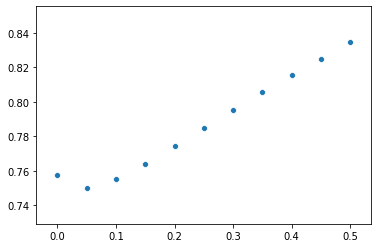

In [18]:
sns.scatterplot(alphas,MSE)
#clear minimum at 0.05

In [19]:
alpha= alphas[np.argmin(MSE)]
alpha

0.05

In [20]:
#use best alpha value to use Ridge regression on test set
ridge=linear_model.Ridge(alpha=alpha,normalize=True)
ridge.fit(X_train, y_train)
train_pred= ridge.predict(X_train)
test_pred=ridge.predict(X_test)
train_mse=metrics.mean_squared_error(y_train, train_pred)
test_mse=metrics.mean_squared_error(y_test, test_pred)

print(train_mse**.5)
print(test_mse**.5)

0.6660345464060458
0.7067055521114833


In [21]:
#more accurate than simple linear regression, hizzah for hyperparameters.
for n in range(len(train.columns)-1):
    print(f'Coefficient for {train.columns[n]} \t {ridge.coef_[n]}')

Coefficient for lcavol 	 0.5150113097084422
Coefficient for lweight 	 0.606072986477245
Coefficient for age 	 -0.016006640822334082
Coefficient for lbph 	 0.14017828813429473
Coefficient for svi 	 0.6956175514337606
Coefficient for lcp 	 -0.1394215093148776
Coefficient for gleason 	 0.006695464350646534
Coefficient for pgg45 	 0.007640029385174177


# Boston

In [22]:
X,y = load_boston(return_X_y=True)

boston=load_boston()

lr=linear_model.LinearRegression()

data=pd.DataFrame(X,columns=boston.feature_names)
target=pd.DataFrame(y,columns=['MEDV'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
#details on dataset and descripters
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
comparison=pd.concat([data,target],axis=1)
comparison.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

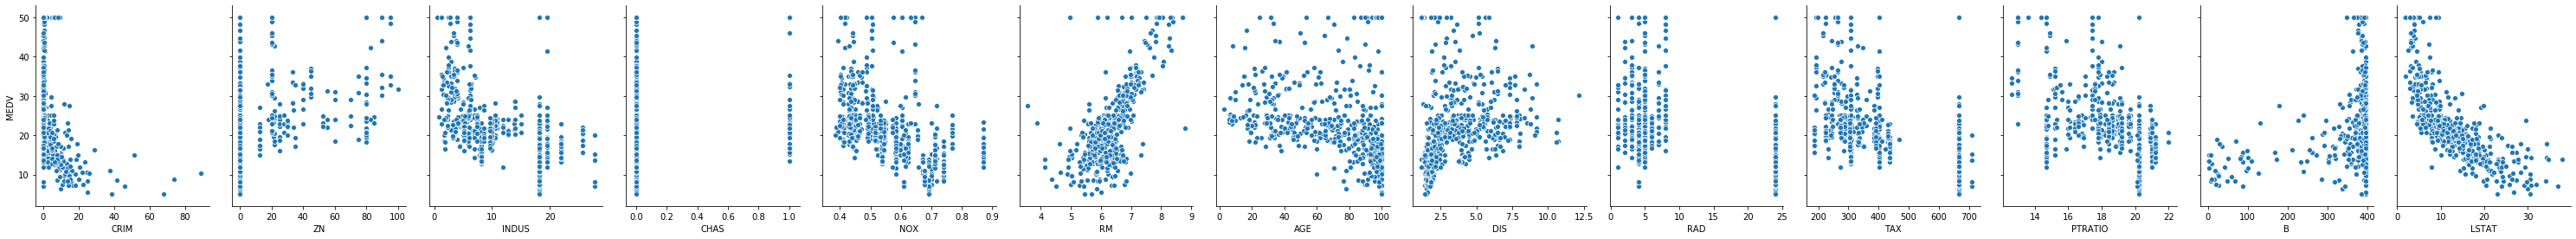

In [25]:

g=sns.pairplot(comparison,x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],y_vars='MEDV',aspect=.8,height=4)
g.savefig('Boston Median Value.tif',dpi=150)

## Linear Regression

In [30]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y,test_size=0.3)

In [32]:
X_train_df=pd.DataFrame(X_train,columns=boston.feature_names)
y_train_df=pd.DataFrame(y_train,columns=['MEDV'])

X_test_df=pd.DataFrame(X_test,columns=boston.feature_names)
y_test_df=pd.DataFrame(y_test,columns=['MEDV'])

In [37]:
lr= linear_model.LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [39]:
train_prediction=lr.predict(X_train)
test_prediction=lr.predict(X_test)

train_mse=metrics.mean_squared_error(y_train,train_prediction)
test_mse=metrics.mean_squared_error(y_test,test_prediction)

print(train_mse**.5)
print(test_mse**.5)
#std deviation of 4 to 5 thousand dollar prediction.
#can we get it lower? try ridge regression

4.484149326323106
5.198728332249968


## Ridge regression

In [41]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.mean_squared_error(y,preds)**.5

In [92]:
alphas = np.linspace(0,1,101)
alphas

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [99]:
#find best alpha parameter based off training set
MSRE=[]
for a in alphas:
    ridge = linear_model.Ridge(alpha=a,normalize=True)
    msre=model_selection.cross_val_score(ridge, X_train, y_train, cv=10,scoring=scorer)
    MSRE.append(msre.mean())


0.018000000000000002

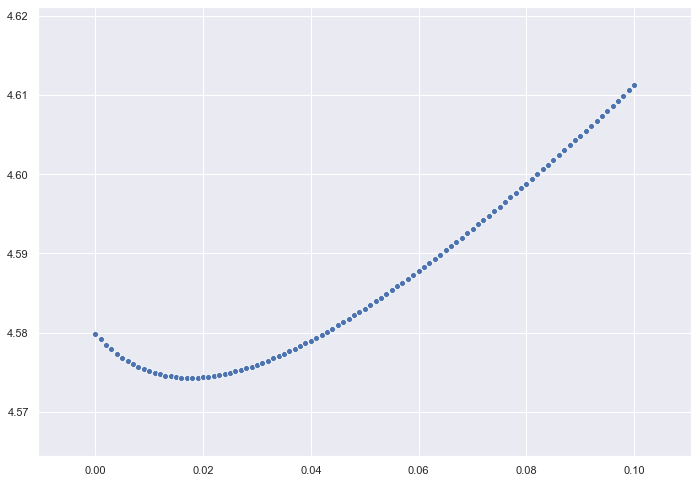

In [100]:
sns.scatterplot(alphas,MSRE)
alpha=alphas[np.argmin(MSRE)]
alpha

In [102]:
#use best alpha value to use Ridge regression on test set
ridge=linear_model.Ridge(alpha=0,normalize=True)
ridge.fit(X_train, y_train)
train_pred= ridge.predict(X_train)
test_pred=ridge.predict(X_test)
train_mse=metrics.mean_squared_error(y_train, train_pred)
test_mse=metrics.mean_squared_error(y_test, test_pred)

print(train_mse**.5)
print(test_mse**.5)
#interesting, worse std!
#despite finding a minimum in alpha, hyper parameter alpha is best set to 0.

4.484149326323106
5.19872833224997


In [61]:
for n in range(len(data.columns)):
    print(f'Coefficient for {data.columns[n]} \t {ridge.coef_[n]}')


Coefficient for CRIM 	 -0.10272962771100144
Coefficient for ZN 	 0.05212233160536308
Coefficient for INDUS 	 0.0026114523650739682
Coefficient for CHAS 	 2.1360151665527436
Coefficient for NOX 	 -14.883352550598731
Coefficient for RM 	 4.024213147367668
Coefficient for AGE 	 0.00322491011153133
Coefficient for DIS 	 -1.3416896838075323
Coefficient for RAD 	 0.3116076043214197
Coefficient for TAX 	 -0.013541380224833047
Coefficient for PTRATIO 	 -0.9892314187763517
Coefficient for B 	 0.012099595300491555
Coefficient for LSTAT 	 -0.5039430770718888


## Feature selection

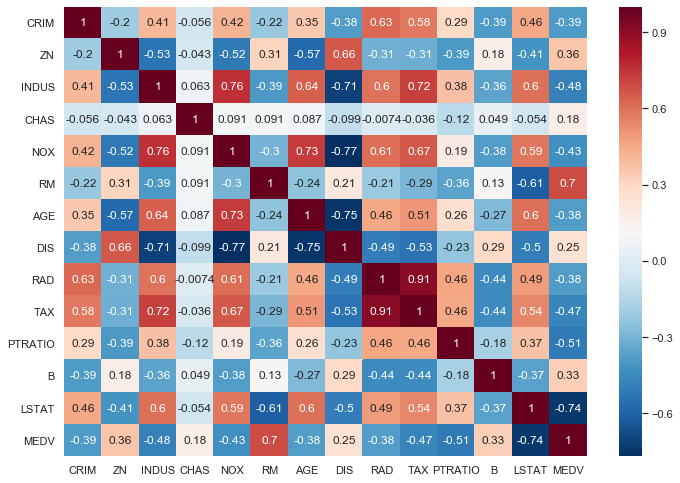

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(comparison.corr(),cmap='RdBu_r',annot=True,)
#it appears that CHAS column has very little correlation with anything...because its a 0 1 dummy variable on wether land is
#touching riverfront, remove it from our linear regression models


In [78]:
data_fs1=data.drop('CHAS',axis=1)

In [89]:
X_train_2, X_test_2, y_train_2, y_test_2=model_selection.train_test_split(data_fs1,target,test_size=0.3)

In [90]:
lr= linear_model.LinearRegression(normalize=True)
lr.fit(X_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [98]:
train_prediction_2=lr.predict(X_train_2)
test_prediction_2=lr.predict(X_test_2)

train_mse_2=metrics.mean_squared_error(y_train_2,train_prediction_2)
test_mse_2=metrics.mean_squared_error(y_test_2,test_prediction_2)

print(train_mse_2**.5)
print(test_mse_2**.5)
#std deviation of 4 to 5 thousand dollar prediction.
# pretty solid std

4.635234936182963
5.1390749148057475


In [103]:
alphas = np.linspace(0,.1,101)
alphas

#find best alpha parameter based off training set 2
MSRE=[]
for a in alphas:
    ridge = linear_model.Ridge(alpha=a,normalize=True)
    msre=model_selection.cross_val_score(ridge, X_train_2, y_train_2, cv=10,scoring=scorer)
    MSRE.append(msre.mean())


0.01

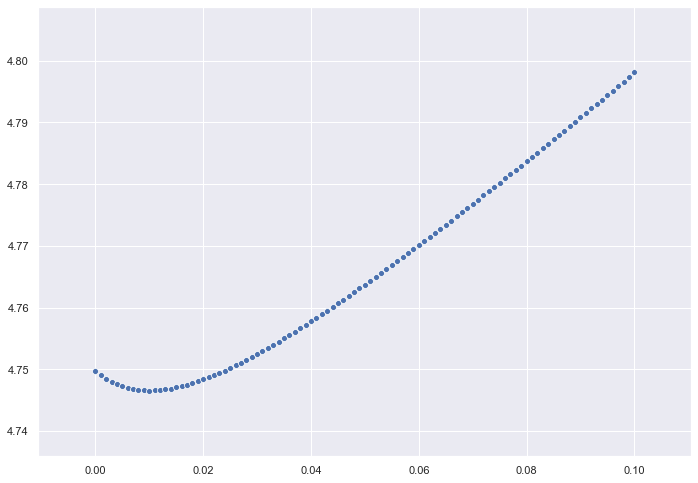

In [104]:
sns.scatterplot(alphas,MSRE)
alpha=alphas[np.argmin(MSRE)]
alpha

In [105]:
#use best alpha value to use Ridge regression on test set
ridge=linear_model.Ridge(alpha=alpha,normalize=True)
ridge.fit(X_train_2, y_train_2)
train_pred_2= ridge.predict(X_train_2)
test_pred_2=ridge.predict(X_test_2)
train_mse_2=metrics.mean_squared_error(y_train_2, train_pred_2)
test_mse_2=metrics.mean_squared_error(y_test_2, test_pred_2)

print(train_mse_2**.5)
print(test_mse_2**.5)
#interesting, worse std!
#despite finding a minimum in alpha, hyper parameter alpha is best set to 0.

4.638645893028941
5.116769151264165
